# 0.0 Imports

In [91]:
import pandas as pd
import numpy as np
import inflection
import math
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## 0.1 Helper Functions

## 0.2 Loading Data

In [10]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

# merge

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

df_raw.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
7797,1108,6,2015-07-25,2084,207,1,0,0,0,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
954632,978,2,2013-02-26,4995,807,1,0,0,0,c,c,3890.0,NaN,NaN,0,NaN,NaN,NaN
755507,323,5,2013-08-23,5781,573,1,0,0,0,d,c,8400.0,4.0,2012.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
225943,714,6,2015-01-10,4751,375,1,0,0,0,d,c,12070.0,10.0,2005.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct"
903828,349,5,2013-04-12,24672,1975,1,1,0,0,c,c,1490.0,4.0,2009.0,0,NaN,NaN,NaN


# 1.0 Descrição dos Dados

In [14]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [16]:
cols = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 
        'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2', 
        'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']


snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols))

df1.columns = cols_new

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 Data Dimension

In [17]:
df1.shape

(1017209, 18)

## 1.3 Data Types

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   store                         1017209 non-null  int64         
 1   day_of_week                   1017209 non-null  int64         
 2   date                          1017209 non-null  datetime64[ns]
 3   sales                         1017209 non-null  int64         
 4   customers                     1017209 non-null  int64         
 5   open                          1017209 non-null  int64         
 6   promo                         1017209 non-null  int64         
 7   state_holiday                 1017209 non-null  object        
 8   school_holiday                1017209 non-null  int64         
 9   store_type                    1017209 non-null  object        
 10  assortment                    1017209 non-null  object        
 11

In [19]:
#alterando a colunda data de object para tipo data

df1['date'] = pd.to_datetime(df1['date'])

## 1.4 Check NA

In [26]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [29]:
#competition_distance  

df1['competition_distance'] = (df1['competition_distance'].
                               apply(lambda x: 200000.0 if math.isnan(x) else (x)))


#competition_open_since_month
df1['competition_open_since_month'] = (df1.apply(lambda x: x['date'].
                                                 month if math.isnan(x['competition_open_since_month'])
                                                 else x['competition_open_since_month'], axis=1))

#competition_open_since_year
df1['competition_open_since_year'] = (df1.apply(lambda x: x['date'].
                                                 year if math.isnan(x['competition_open_since_year'])
                                                 else x['competition_open_since_year'], axis=1))

#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week'])
                                               else x['promo2_since_week'], axis=1)


#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year'])
                                               else x['promo2_since_year'], axis=1)

#promo_interval

month_map = { 1: 'Jan', 2: 'Feb',  3: 'Mar',  4: 'Apr',  5: 'May', 6: 'Jun',  
             7: 'Jul',  8: 'Aug',  9: 'Sept',  10: 'Oct',  11: 'Nov',  12: 'Dec'}

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = (df1[['promo_interval', 'month_map']].
                   apply(lambda x: 0 if x['promo_interval'] == 0 
                         else 1 if x['month_map'] in x['promo_interval'].split(',') 
                         else 0, axis=1))


In [44]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change Types

In [46]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistical

In [62]:
num_attributes = df1.select_dtypes(include = ['int32', 'int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int32', 'int64', 'datetime64[ns]', 'float64'])

###  1.7.1 Numerical Attributes

In [61]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T



# Dispersion - std, min, max, ran, skew, curtusis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()

m.columns = ( [ 'features', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ] )
m

,features,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.1 Categorical Attributes

In [63]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

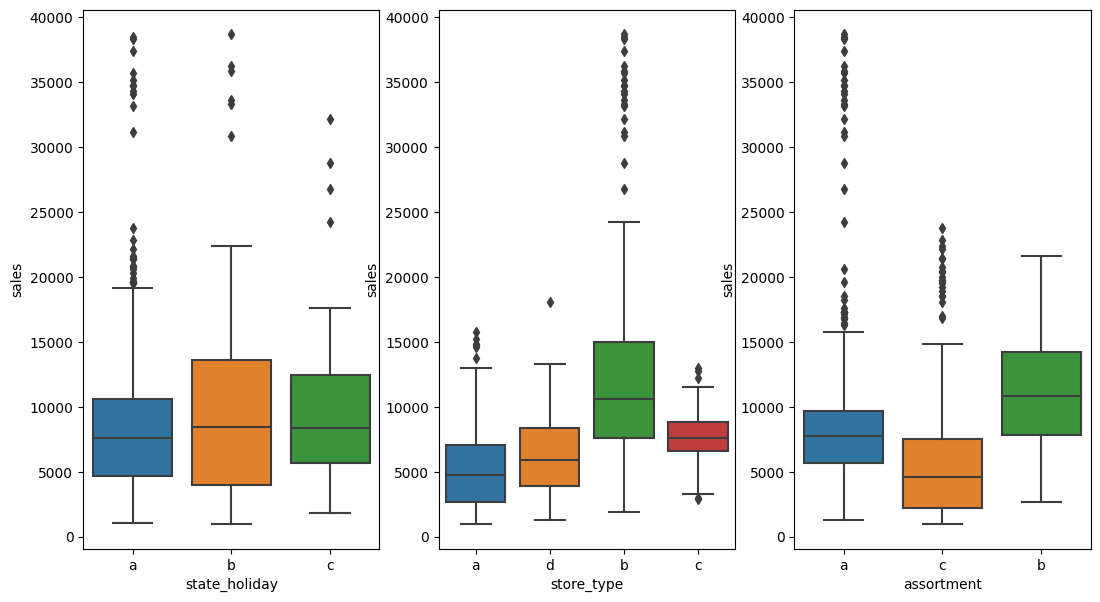

In [79]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.figure(figsize = (13, 7))
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 Featuring Engineering

In [85]:
df2 = df1.copy()

## 2.1 Mapa Mental das Hipóteses


## 2.1.1 Criação das Hipóteses

## 2.2 Lista Final das Hipóteses

## 2.3 Feature Engineering

In [87]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

# day
df2['day'] = df2['date'].dt.day

# week of year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')



In [92]:
# competition since
df2['competition_since'] = (df2.apply(lambda x: datetime.datetime
                                      (year=x['competition_open_since_year'],
                                       month=x['competition_open_since_month'],
                                       day=1), axis=1))


df2['competition_time_month'] = (((df2['date'] - df2['competition_since']) / 30).
                                 apply(lambda x: x.days).astype(int))




# promo since

df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = (df2['promo_since'].
                      apply(lambda x: datetime.datetime.
                            strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7)))


df2['promo_time_week'] = df2['competition_time_month'] = (((df2['date'] - df2['promo_since']) / 7).
                                 apply(lambda x: x.days).astype(int))



# assortment



df2['assortment'] = (df2['assortment'].
                     apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended'))

# state_holiday

df2['state_holiday'] = (df2['state_holiday'].
                     apply(lambda x: 'public_holiday' if x == 'a' 
                           else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' 
                           else 'regular'))

In [93]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular,regular,regular,regular,regular
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a
